In [14]:
import tensorflow as tf
import scipy.stats as st
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import random
#From https://stackoverflow.com/users/4527807/teddy-hartanto answer
from scipy import signal

def gkern(kernlen=21, std1=3,std2=3):
    """Returns a 2D Gaussian kernel array."""
    gkern1d1= signal.gaussian(kernlen, std=std1).reshape(kernlen, 1)
    gkern1d2= signal.gaussian(kernlen, std=std2).reshape(kernlen, 1)


    #print(gkern1d)
    gkern2d = np.outer(gkern1d1, gkern1d2)
    return gkern2d

# Cerebros líquidos, CFD, LCA notebook.
## Preparación de terreno

In [19]:
x_size=100
y_size=100
res=1
def f(res,std1,std2,x_pos,y_pos):
    life_map=np.zeros((y_size,x_size))
    life_map[x_pos:x_pos+res,y_pos:y_pos+res]=gkern(res,std1,std2)
    sns.heatmap(life_map,cmap='viridis',cbar=True)
    return (res,std1,std2,x_pos,y_pos,life_map)
w=interact(f, res=IntSlider(min=1, max=100, step=1, value=10,continuous_update=False),std1=IntSlider(min=1, max=30, step=1, value=3,continuous_update=False),std2=IntSlider(min=1, max=30, step=1, value=3,continuous_update=False),y_pos=IntSlider(min=1, max=y_size-res, step=1, value=0,continuous_update=False),x_pos=IntSlider(min=1, max=x_size-res, step=1, value=0,continuous_update=False));

interactive(children=(IntSlider(value=10, continuous_update=False, description='res', min=1), IntSlider(value=…

In [13]:
(res,std1,std2,x_pos,y_pos,life_map)=w.widget.result
#life_map=np.zeros((res+20,res+20))
#slicer=(slice(20,20+res,1),slice(20,20+res,1))
#life_map[slicer]=-gkern(res,std1,std2)

sns.heatmap(life_map,cmap='viridis',cbar=False)

NameError: name 'w' is not defined

## Listado de agentes
Cada tupla de la lista es la posición de un agente.

In [14]:
agents=[(26,1),(2,28),(1,1)]
images=[]


### Generar un paso de la simulación

In [2]:
render=np.copy(life_map)
for ida,agent in enumerate(agents):
    print (ida)
    
    render[agent]=np.nan
    kernel=(slice(agent[0]-1,agent[0]+2,1),slice(agent[1]-1,agent[1]+2,1))
    idx=np.argmin(life_map[kernel])
    (i,j)=np.unravel_index(idx, (3,3))
    agents[ida]=(agent[0]+i-1,agent[1]+j-1)
    if (i==1 and j==1):
        agents.remove(agent)
        life_map[agent]=np.nan
fig, ax = plt.subplots()
sns.heatmap(render,cmap='viridis',cbar=False,axes=ax)


NameError: name 'np' is not defined

### Mostrar el mapa

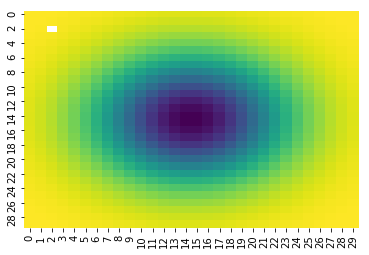

In [417]:
fig, ax = plt.subplots()
sns.heatmap(render,cmap='viridis',cbar=False,axes=ax)

# Experimento 1: **Generar simulación**
### Generar la semilla para que los experimentos sean reproducibles

In [60]:
random.seed(42)

### Generar a los agentes:

In [61]:
agents=[(4,i+4) for i in range(90)]
for i in range(10):
    for j in range(10):
        agents.append((80+i,80+j))
for i in range(200):
    agents.append((90,12))


### Generar el terreno

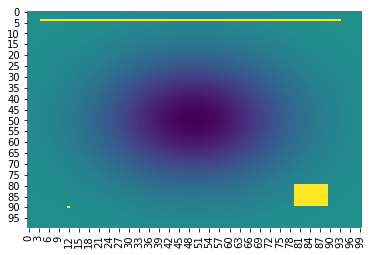

In [62]:

(res,std1,std2)=(100,20,20)
life_map=-gkern(res,std1,std2)
#agents=[(i,j)in range((100,100))]
images=[]
#os.remove('life.gif')
render=np.copy(life_map)
for agent in agents:
    render[agent]=1
fig, ax = plt.subplots()
sns.heatmap(render,cmap='viridis',cbar=False,axes=ax)


### Simulate

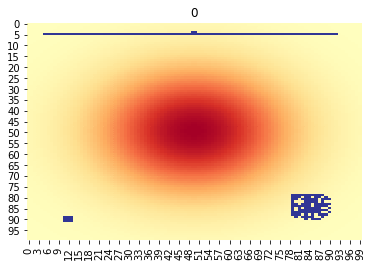

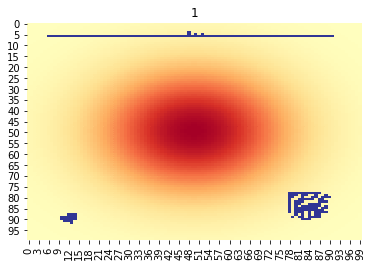

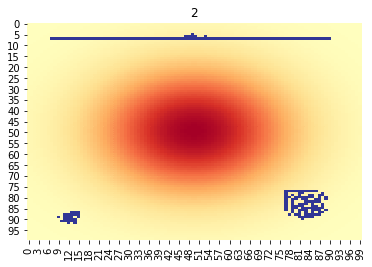

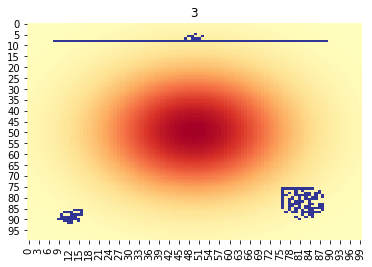

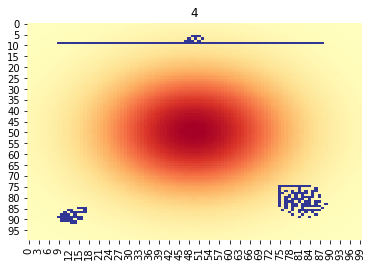

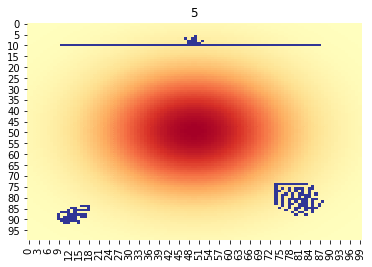

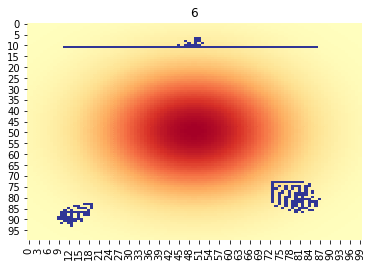

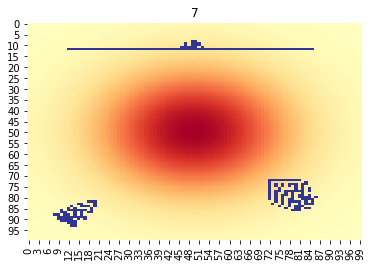

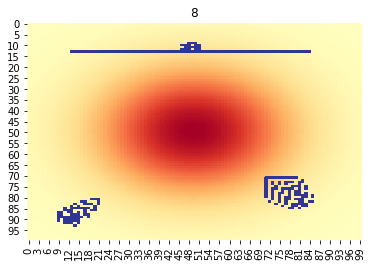

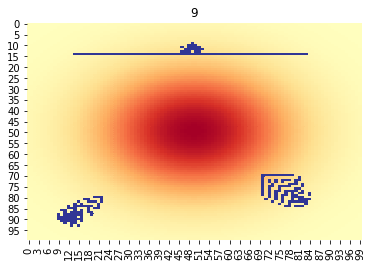

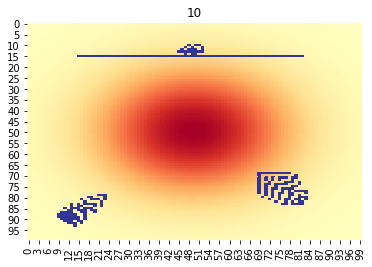

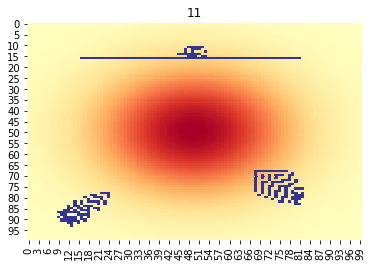

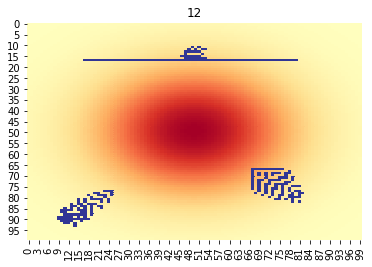

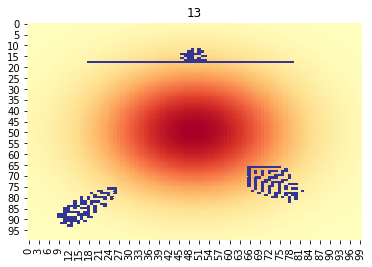

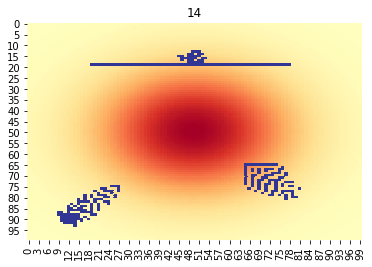

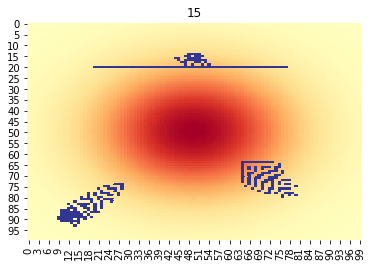

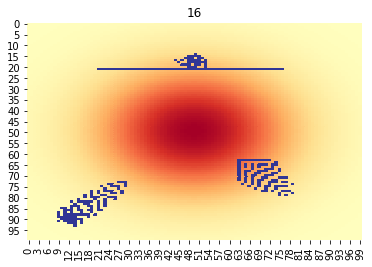

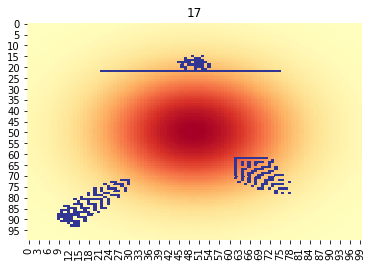

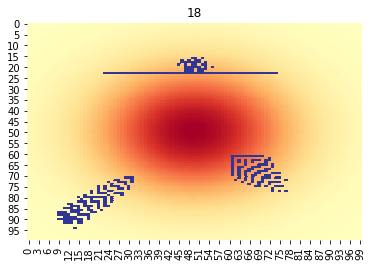

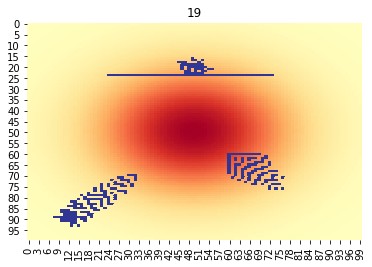

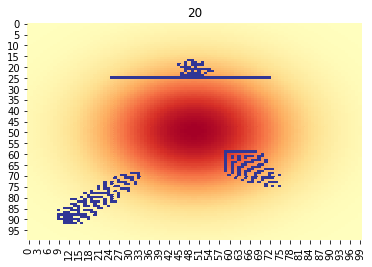

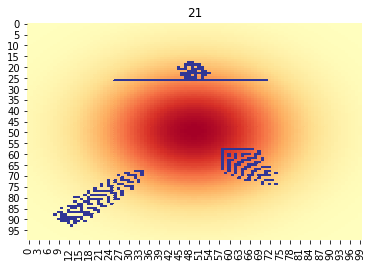

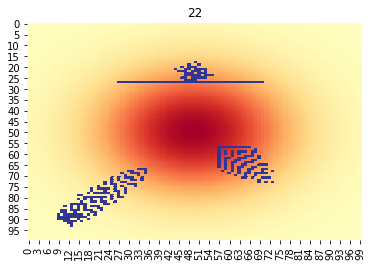

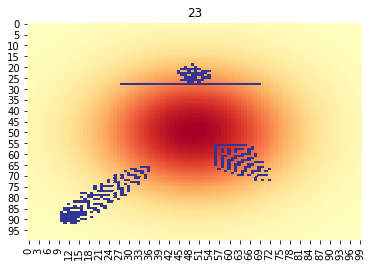

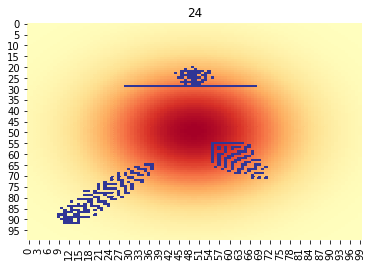

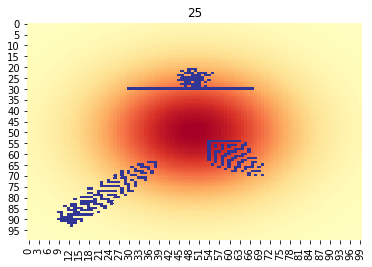

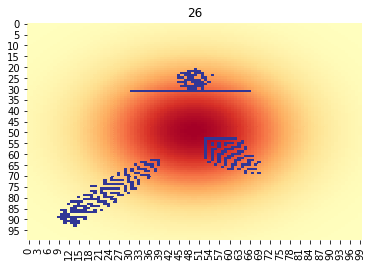

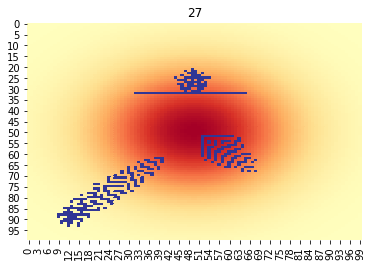

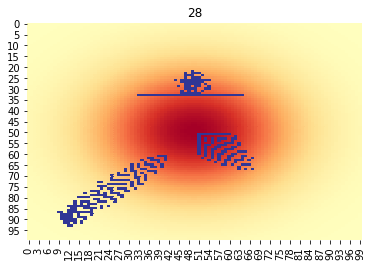

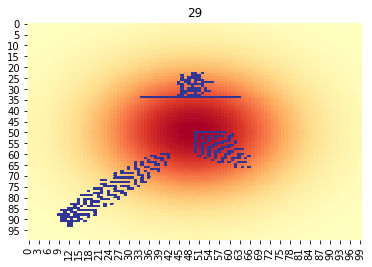

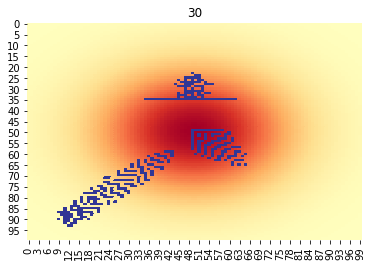

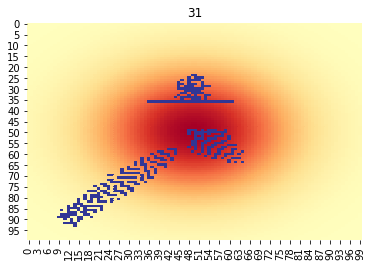

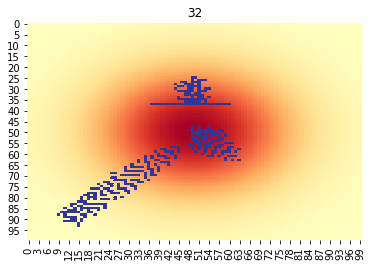

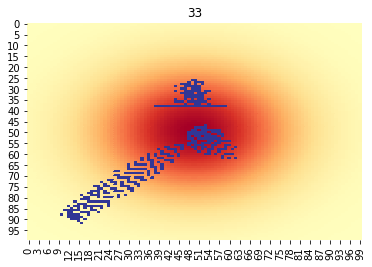

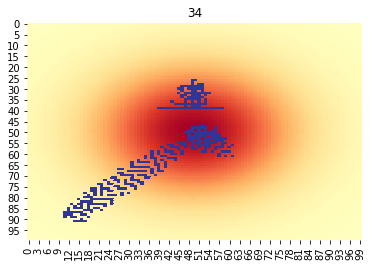

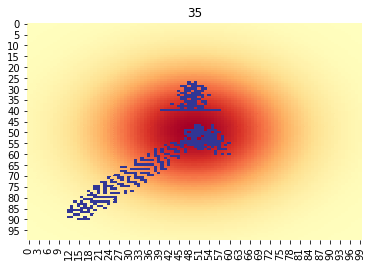

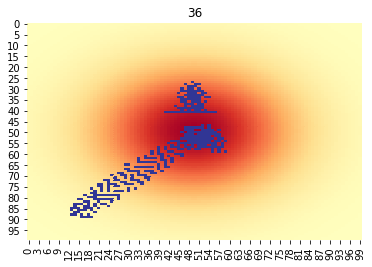

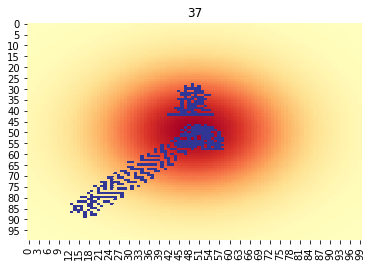

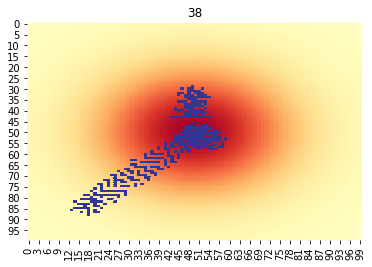

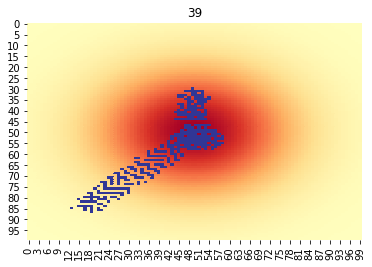

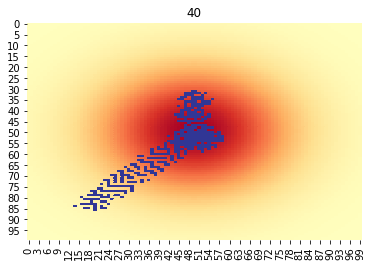

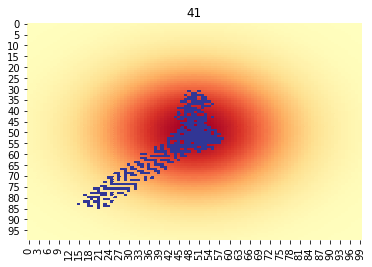

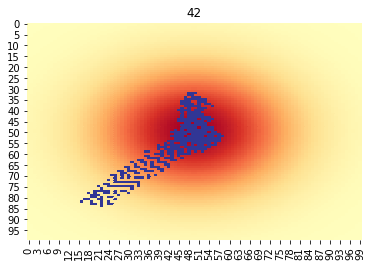

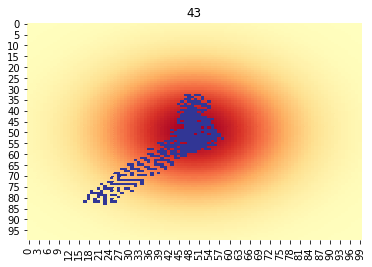

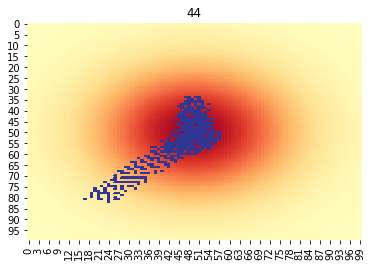

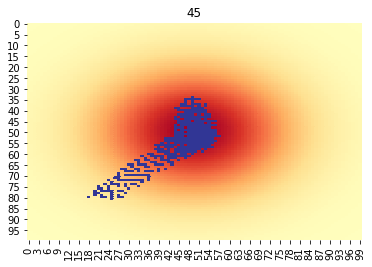

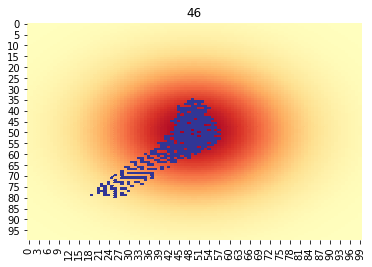

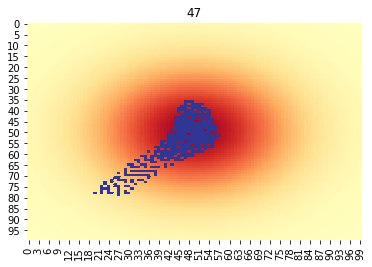

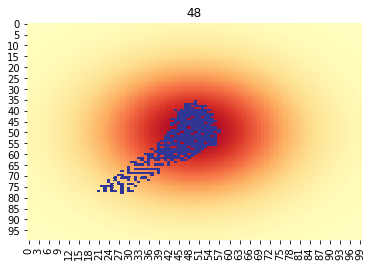

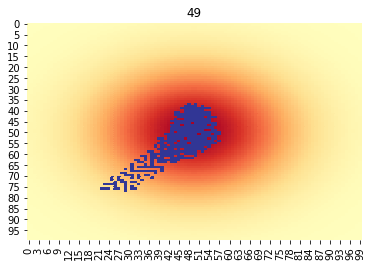

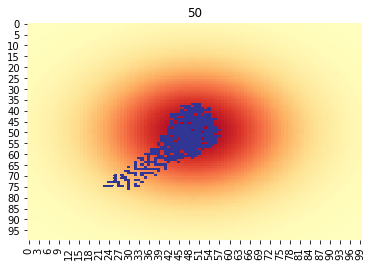

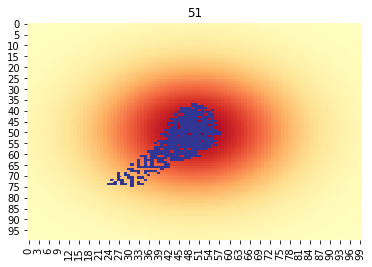

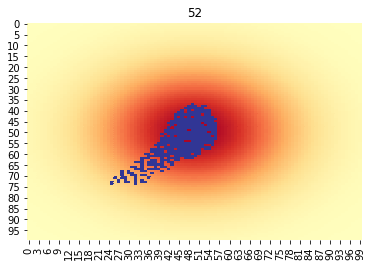

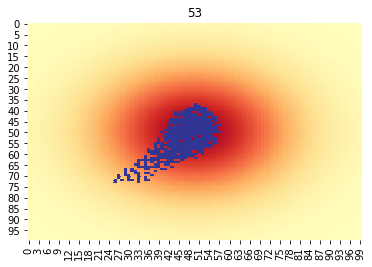

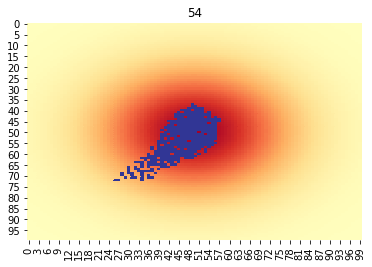

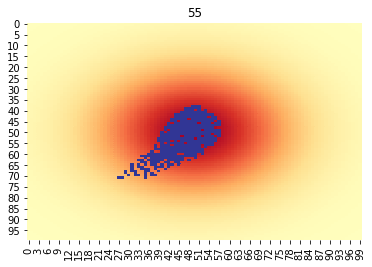

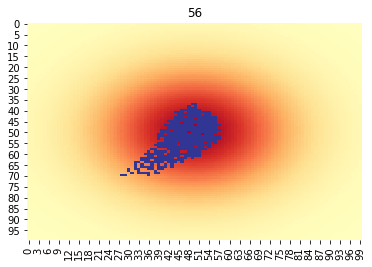

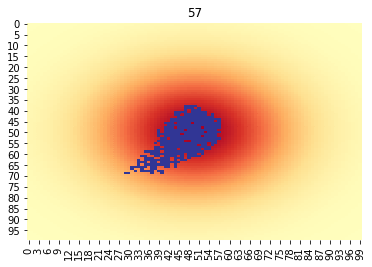

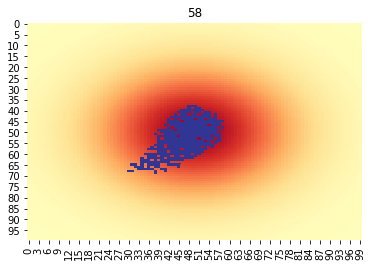

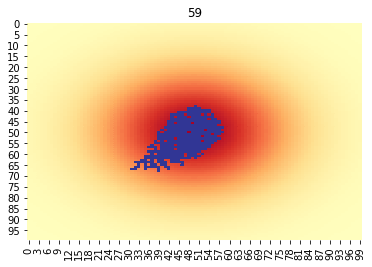

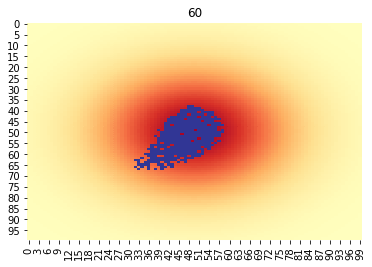

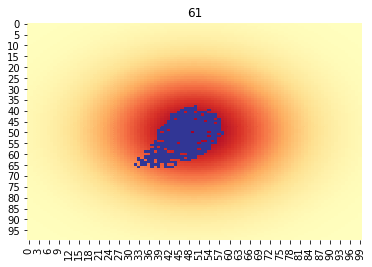

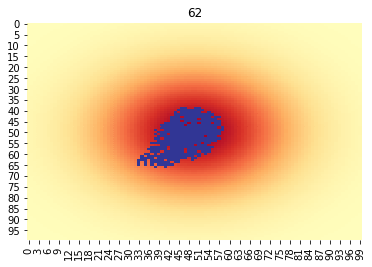

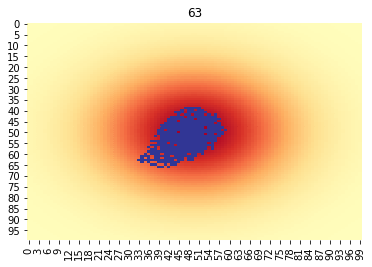

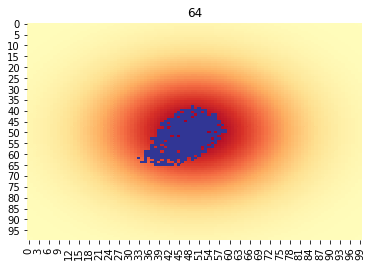

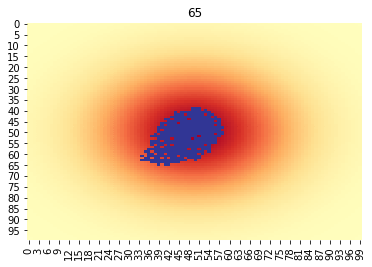

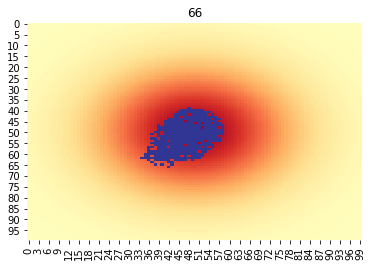

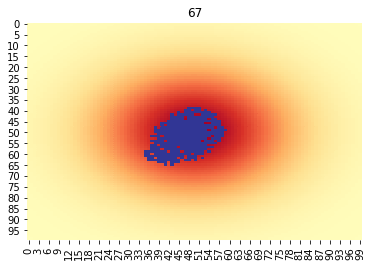

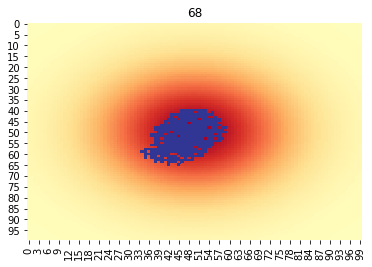

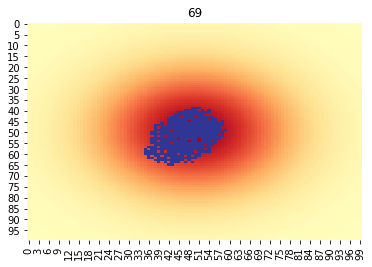

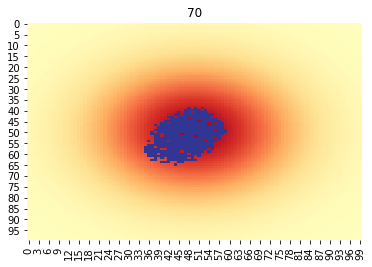

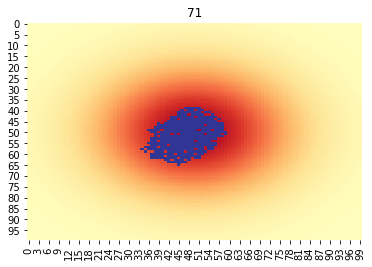

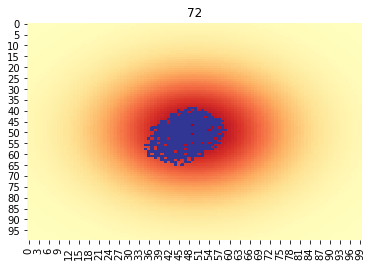

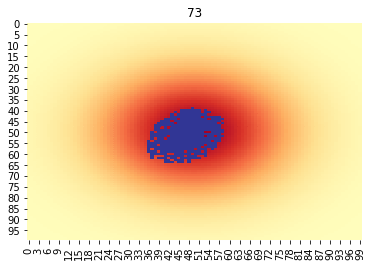

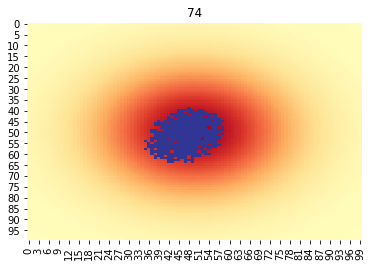

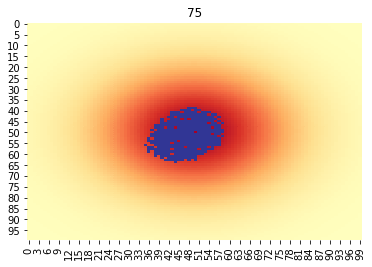

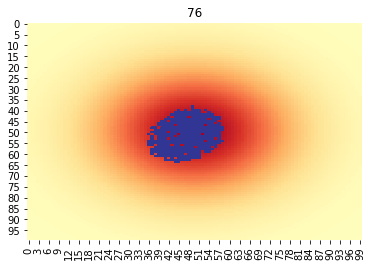

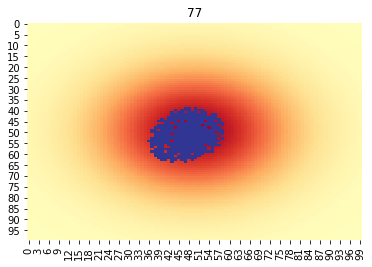

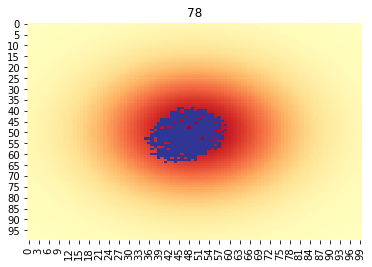

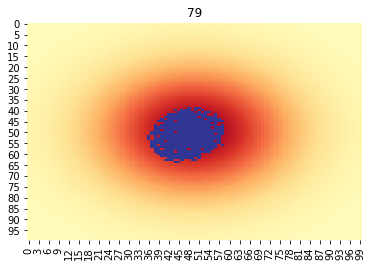

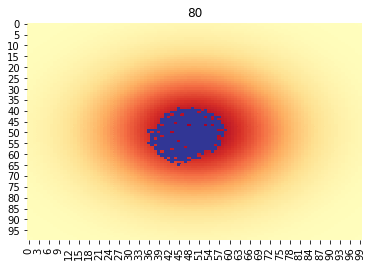

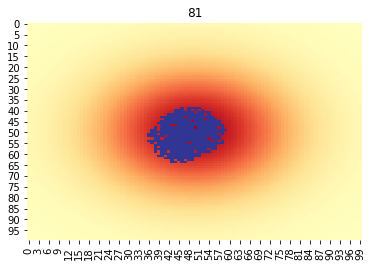

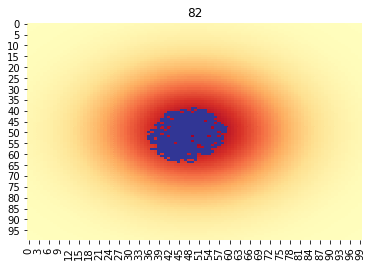

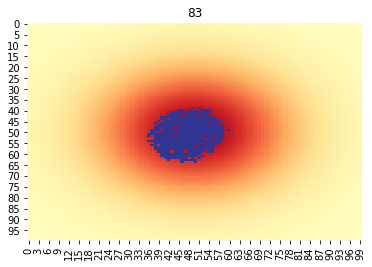

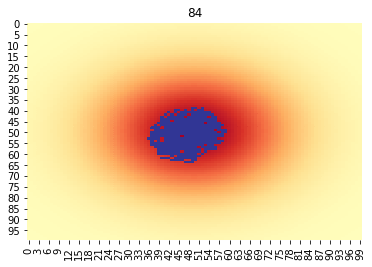

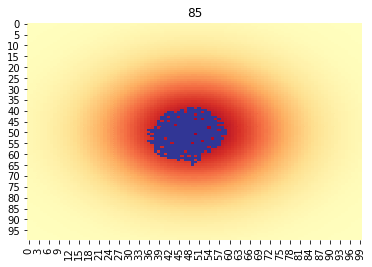

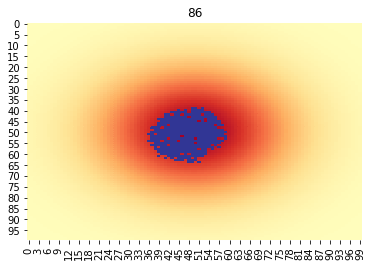

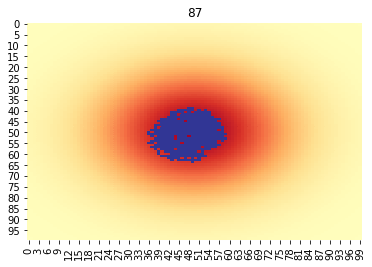

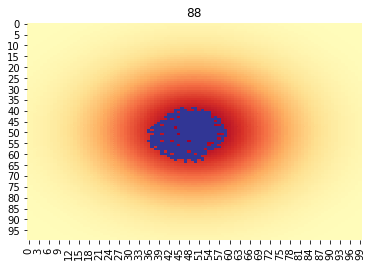

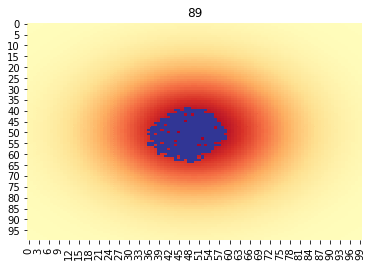

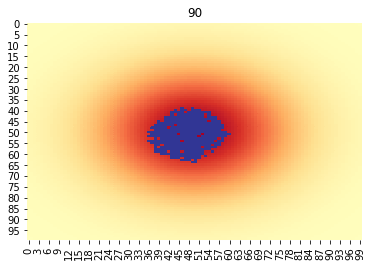

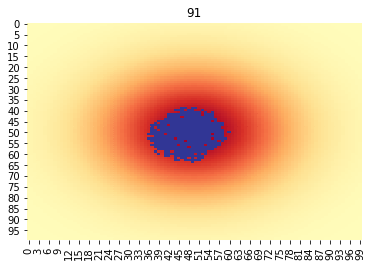

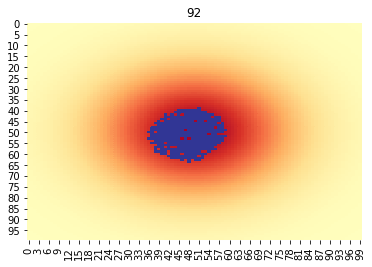

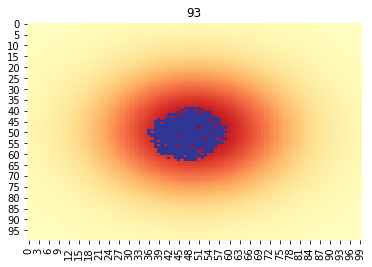

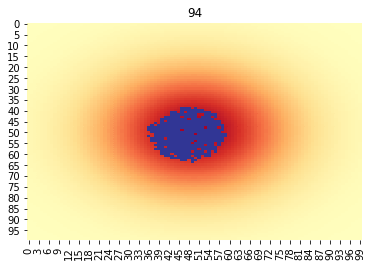

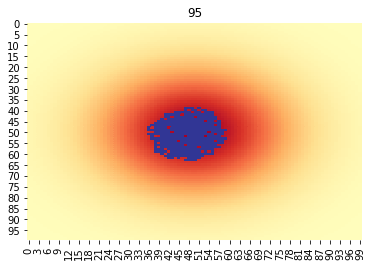

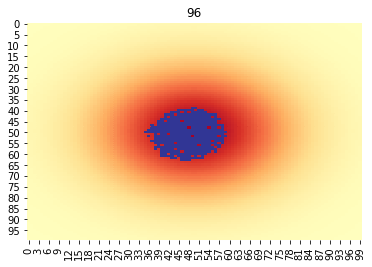

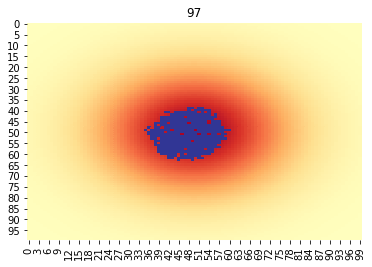

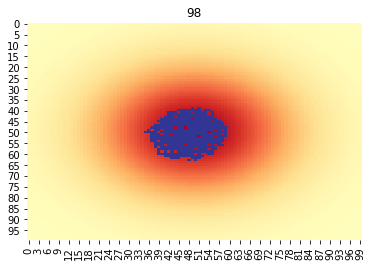

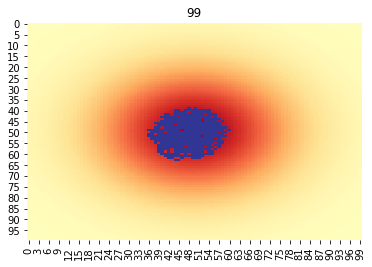

In [63]:

for frame in range(100):
    
    
    random.shuffle(agents)
    #Update every agent position
    for ida,agent in enumerate(agents):
        
        
        
        #compute next agent pos.
        #kernel=(slice(agent[0]-1,agent[0]+2,1),slice(agent[1]-1,agent[1]+2,1))
        #print(render[kernel])
        if not sum(sum(render[agent[0]-1:agent[0]+2,agent[1]-1:agent[1]+2]))==9:
            id_pos=np.argmin(render[agent[0]-1:agent[0]+2,agent[1]-1:agent[1]+2])
            #print(id_pos)
            direction=np.unravel_index(id_pos,(3,3))
            #print(i,j)
            new_pos=(agent[0]+direction[0]-1,agent[1]+direction[1]-1)
            agents[ida]=new_pos
            render[agent]=life_map[agent]
            render[new_pos]=1
        
        
    fig, ax = plt.subplots()
    ax.set_title(frame)
    sns.heatmap(render,cmap='RdYlBu',cbar=False,axes=ax);
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)


### Create gif and show it

In [65]:
kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('life.gif', images, fps=10)

### Show gif from simulation
![SegmentLocal](simulations/life4.gif "segment")

### Experiment overview:
#### Terrain:

The terrain or canvas is a $100 * 100$ matrix where each cell has a height, in this experiment the terrain height is given by the outer product of 2 gaussian kernels with a resolution of 100 samples and 20 of standard deviation.

#### Agents:

The agents are represented as a list of $(x,y)$ pairs that represent the positional existence of a liquid agent. In this simulation each agent computes its next position based in the following rules:

* The only way to stay still is to be completely surrounded by other agents.

* Otherwise he goes to the minimum height of the terrain evaluated in a 3*3 kernel centered in the agents current position.

#### Conclusions:

The agents, as it was expected, clustered around the minimum.
~~this~~

# Experimento 2:

### Crear distintos agentes


In [21]:
agents=[(4,i+4) for i in range(90)]
for i in range(10):
    for j in range(10):
        agents.append((80+i,80+j))
for i in range(200):
    agents.append((90,12))
for i in range(200):
    agents.append((30,120))    

### Crear terrenos distintos.

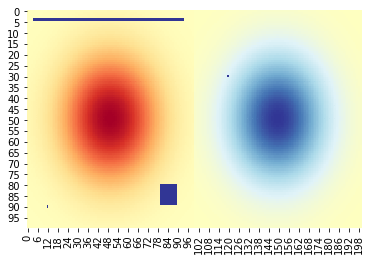

In [22]:
(res,std1,std2)=(100,20,20)
life_map=np.zeros((res,res*2))
life_map[0:res,0:res]=-gkern(res,std1,std2)
life_map[0:res,res:2*res]=gkern(res,std1,std2)
#agents=[(i,j)in range((100,100))]
images=[]
#os.remove('life.gif')
render=np.copy(life_map)
for agent in agents:
    render[agent]=1
fig, ax = plt.subplots()
sns.heatmap(render,cmap='RdYlBu',cbar=False,axes=ax)


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


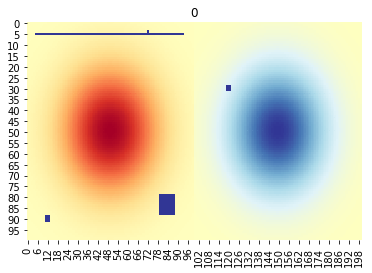

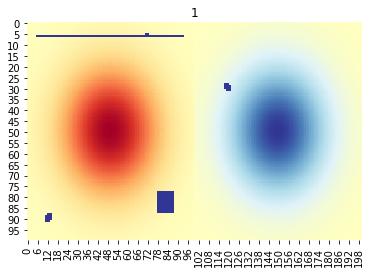

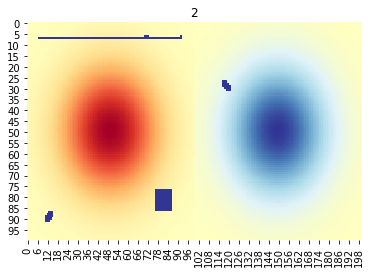

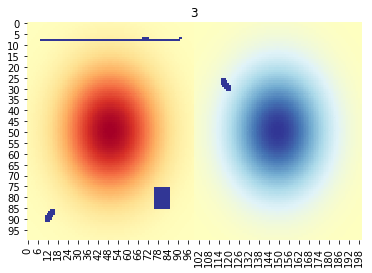

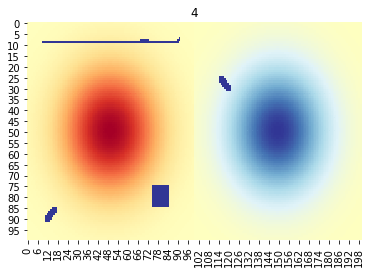

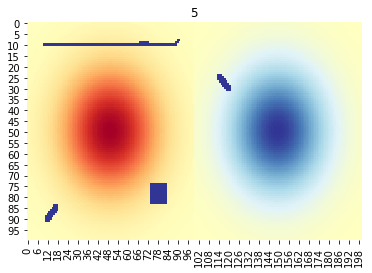

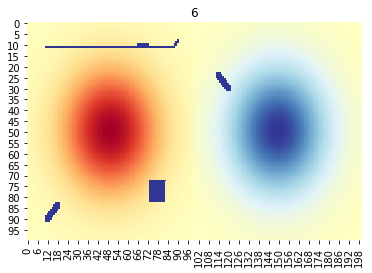

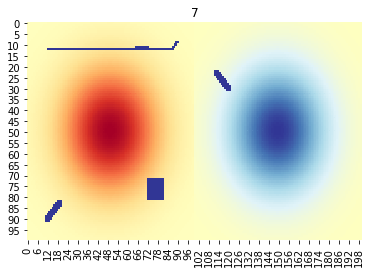

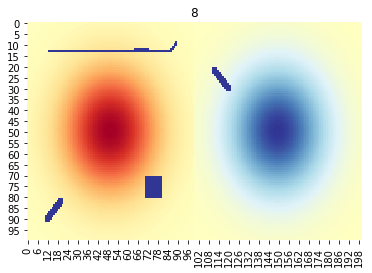

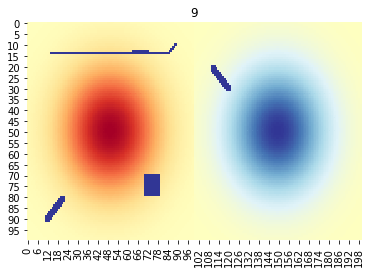

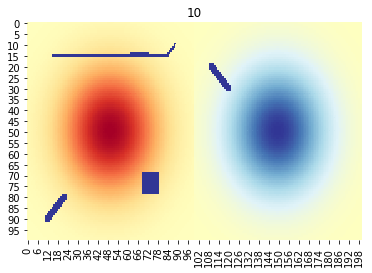

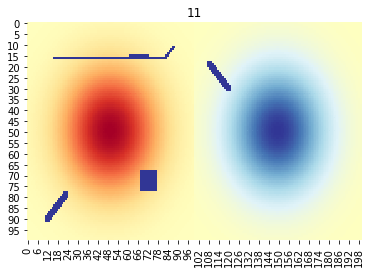

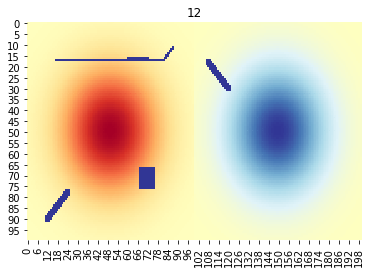

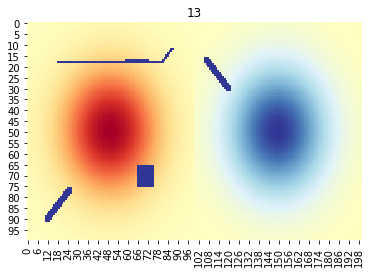

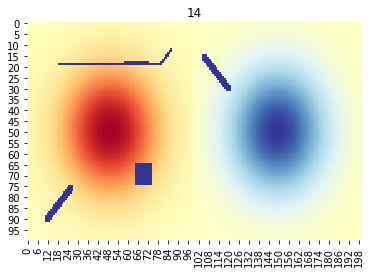

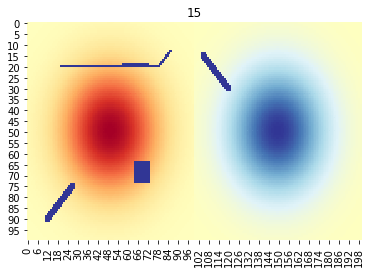

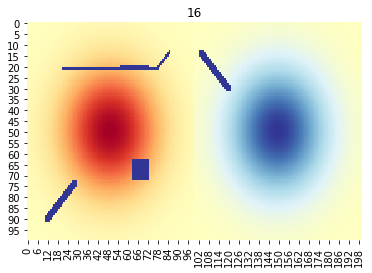

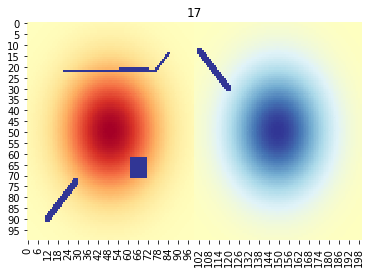

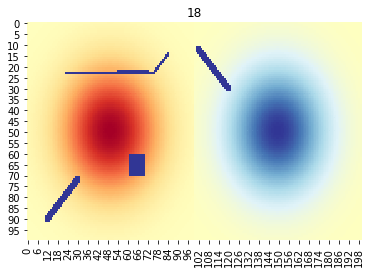

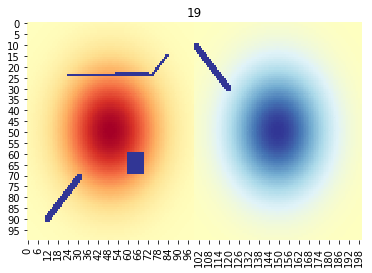

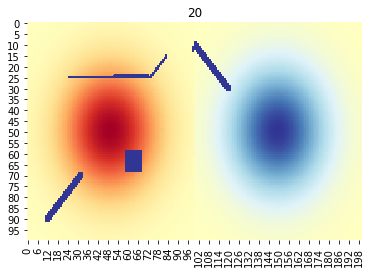

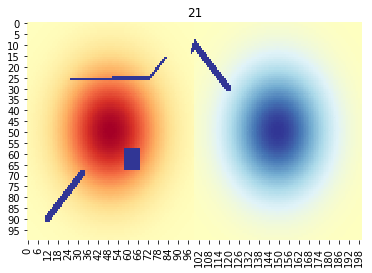

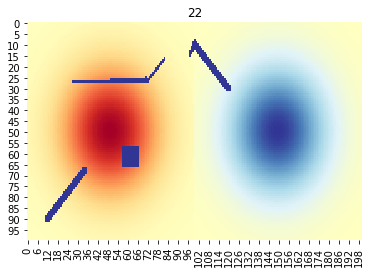

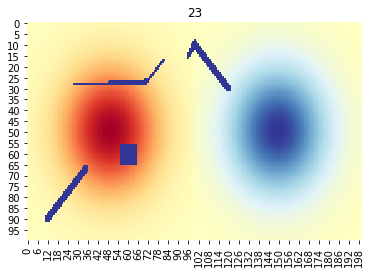

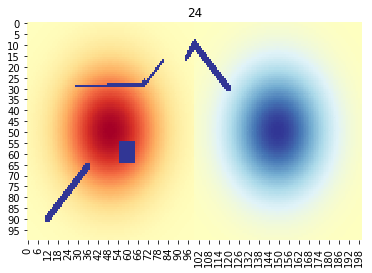

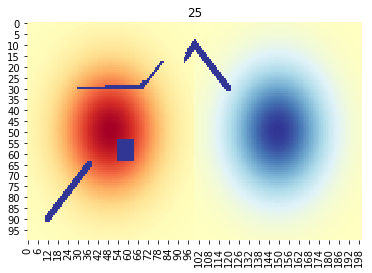

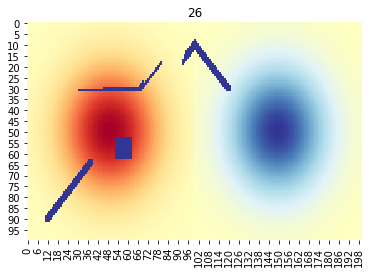

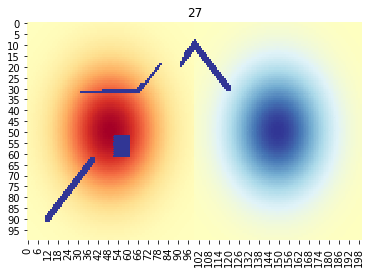

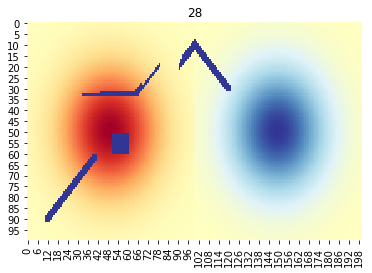

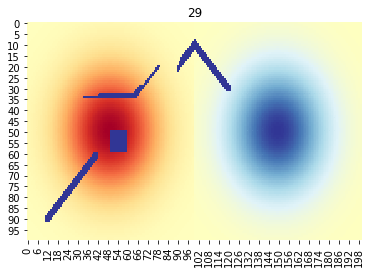

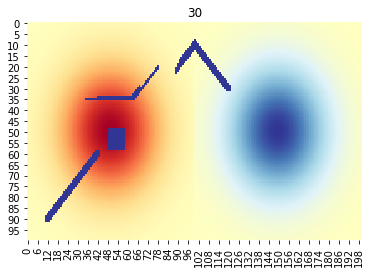

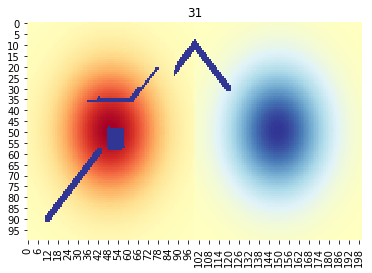

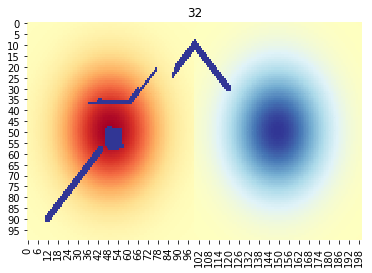

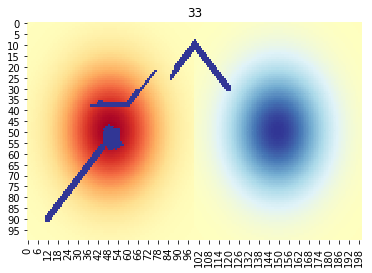

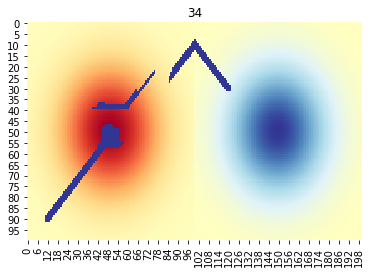

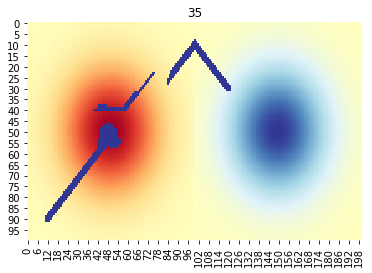

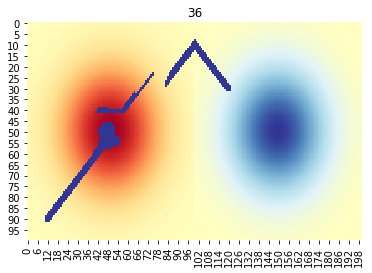

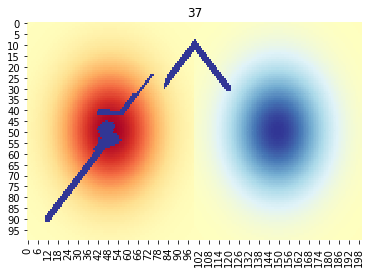

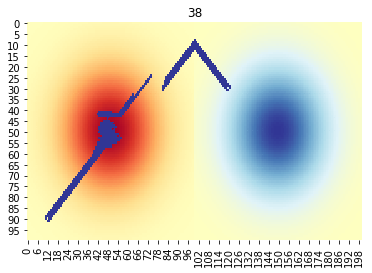

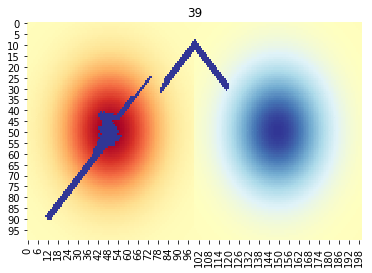

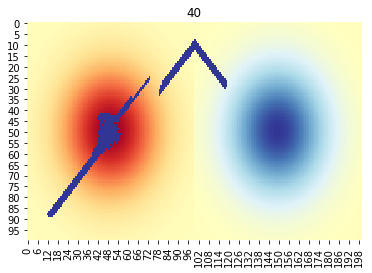

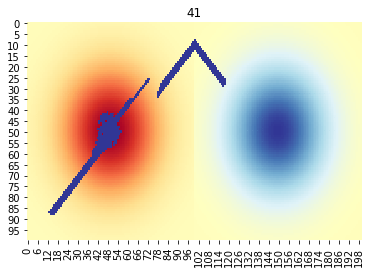

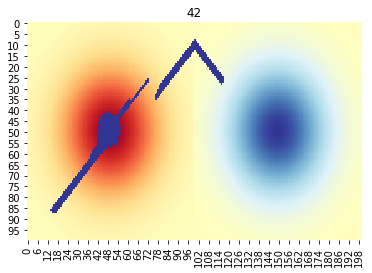

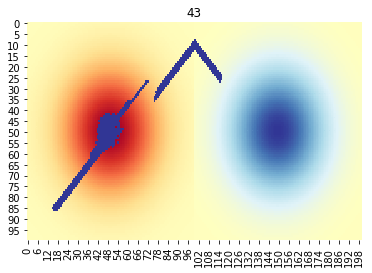

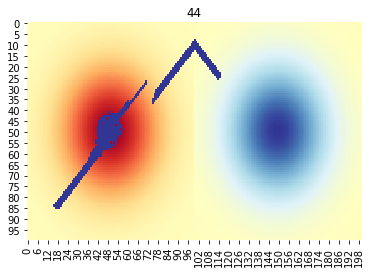

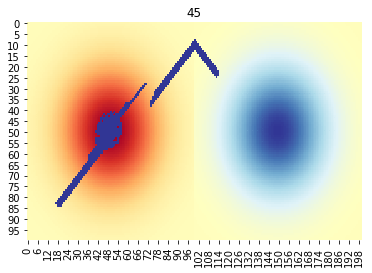

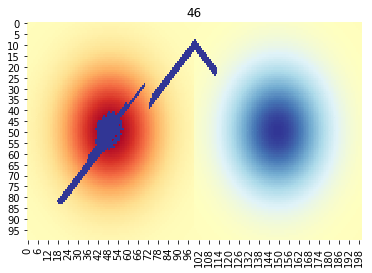

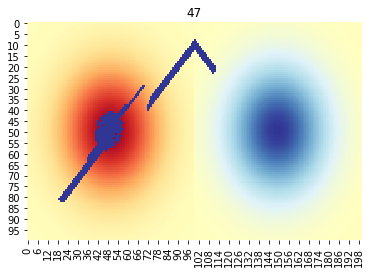

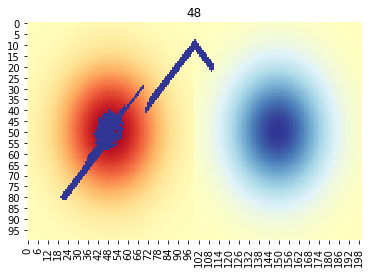

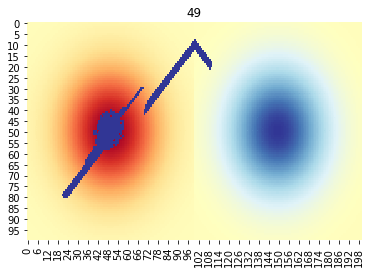

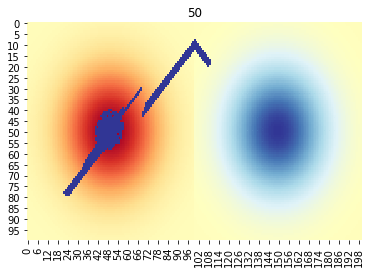

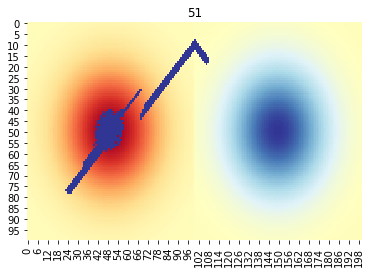

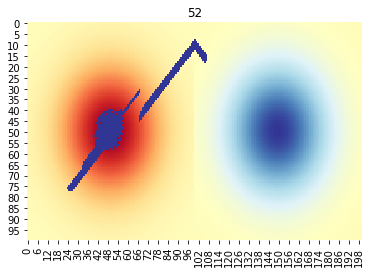

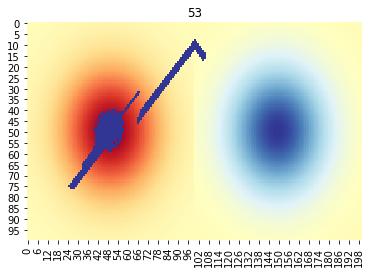

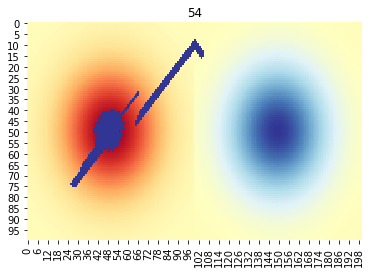

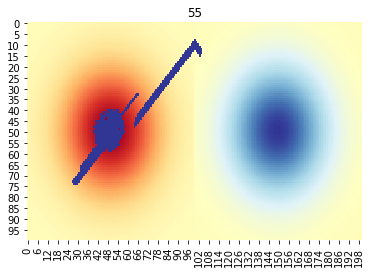

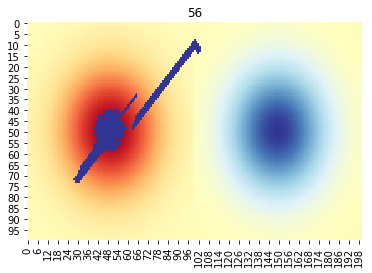

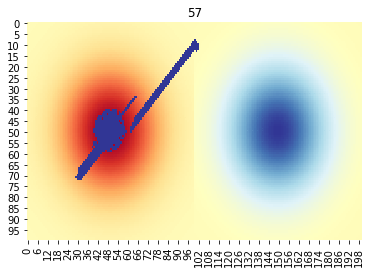

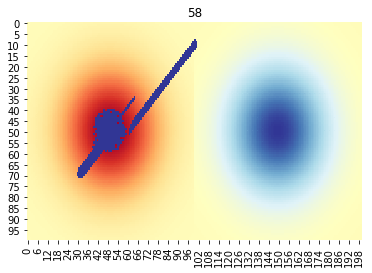

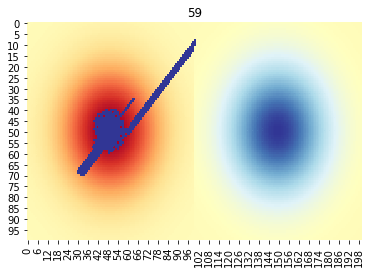

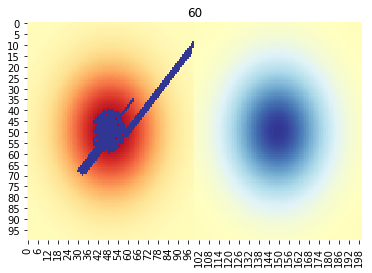

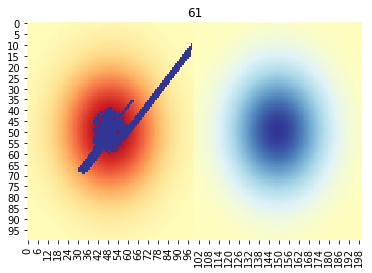

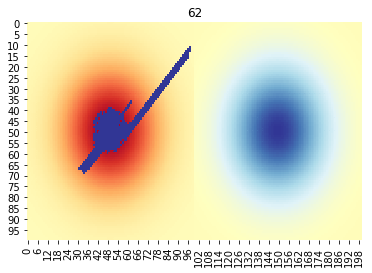

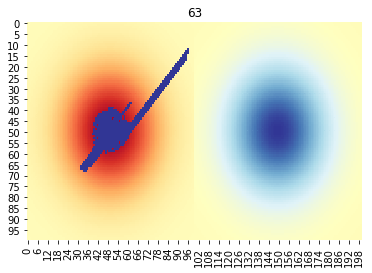

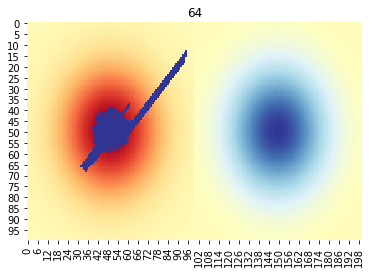

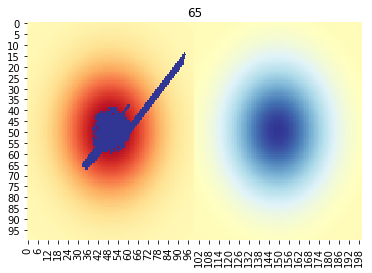

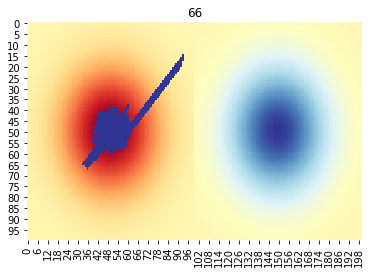

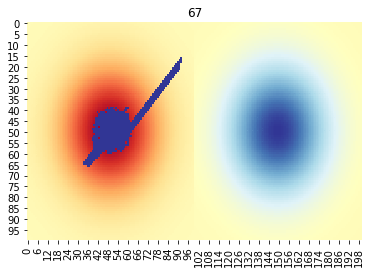

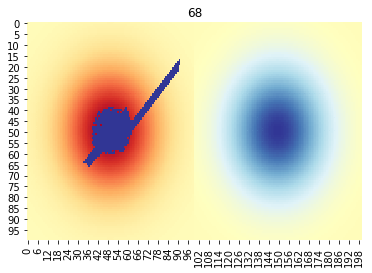

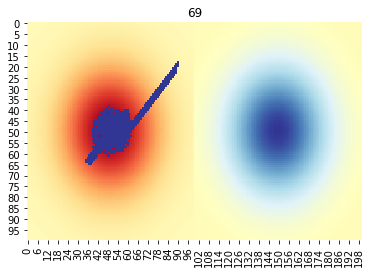

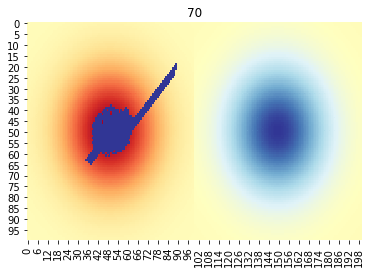

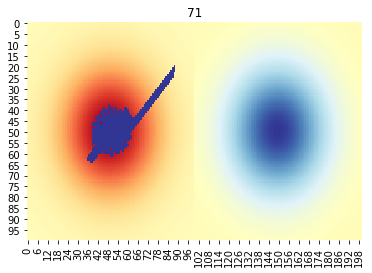

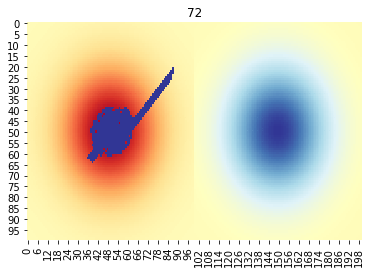

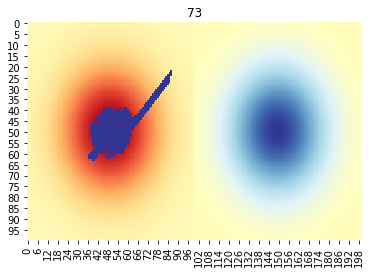

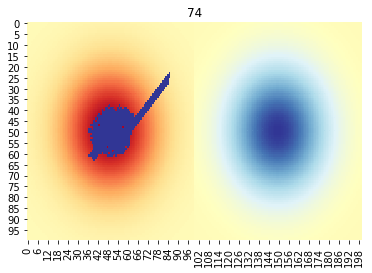

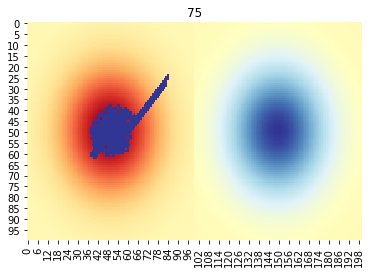

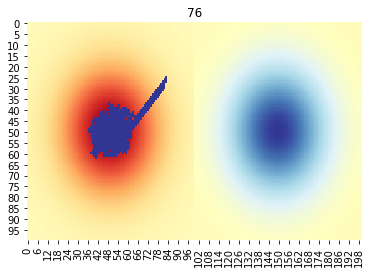

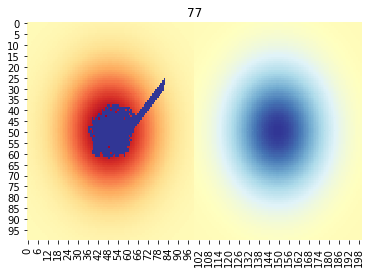

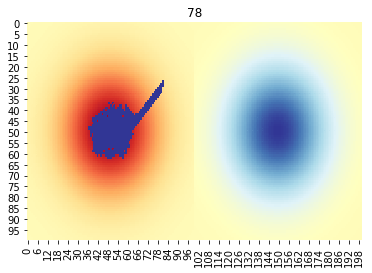

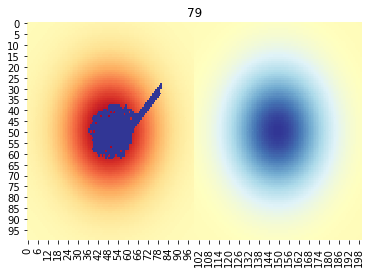

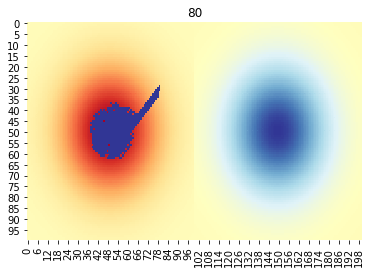

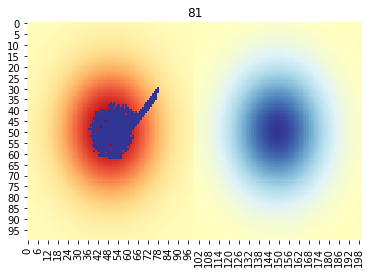

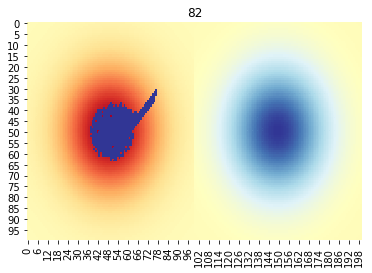

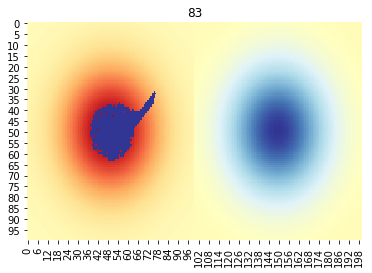

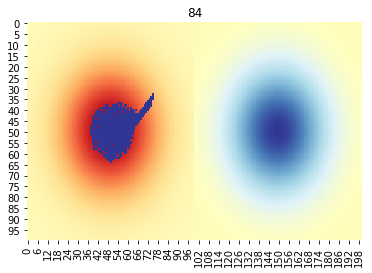

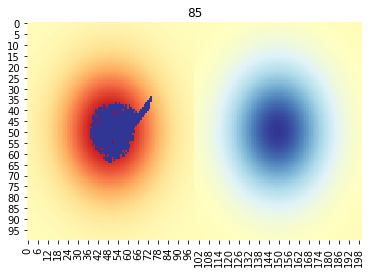

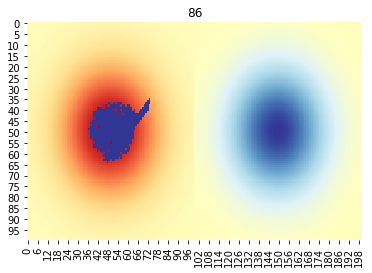

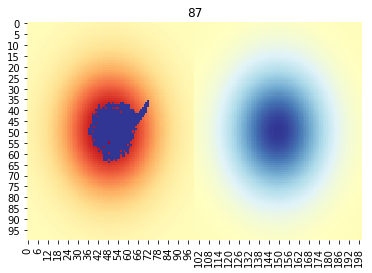

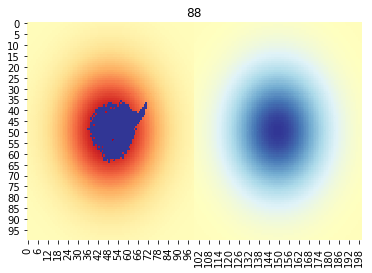

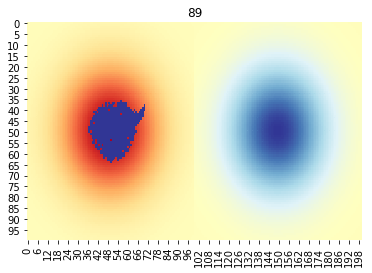

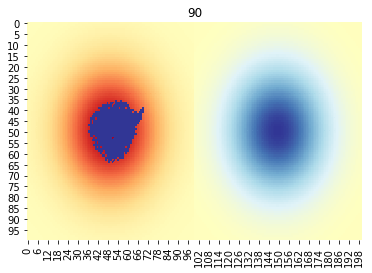

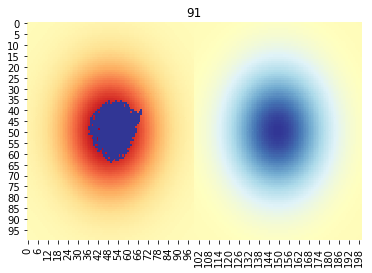

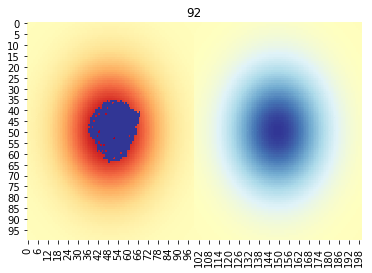

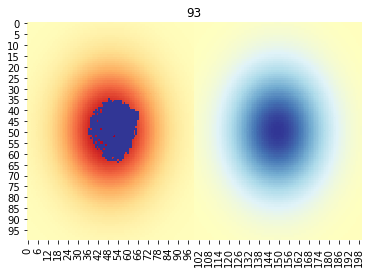

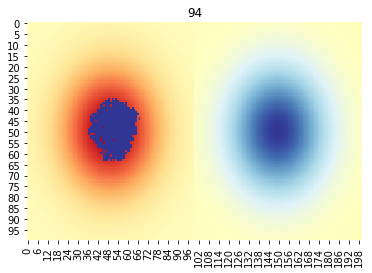

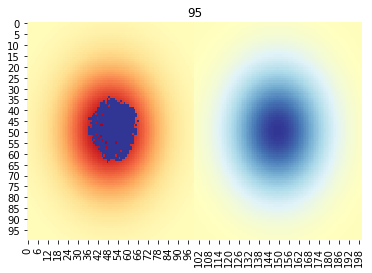

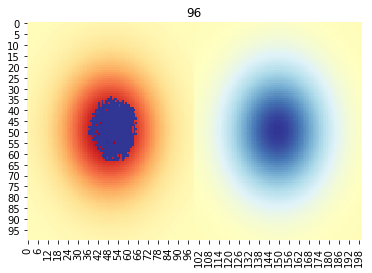

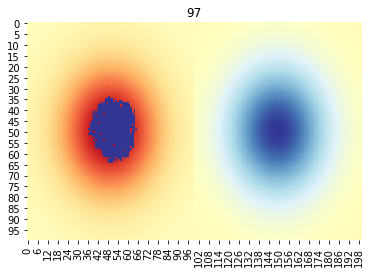

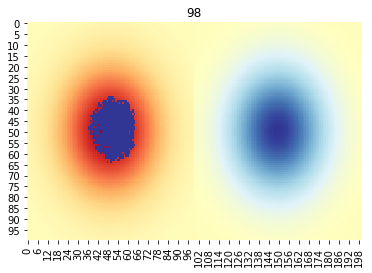

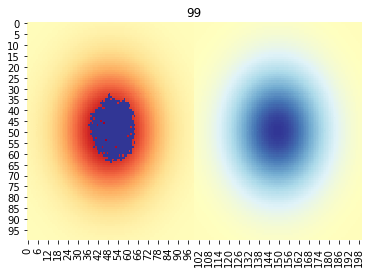

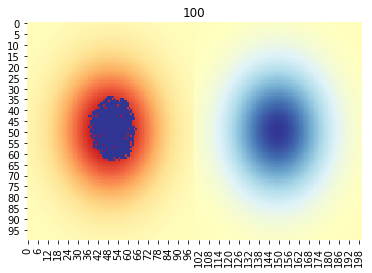

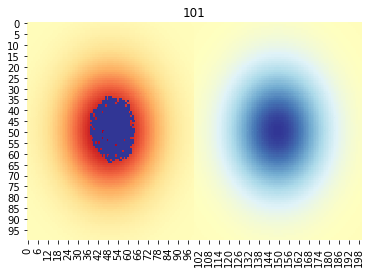

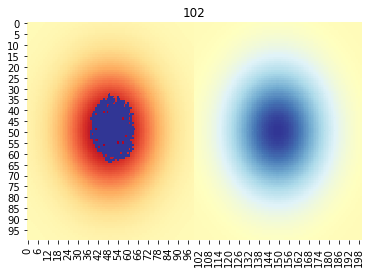

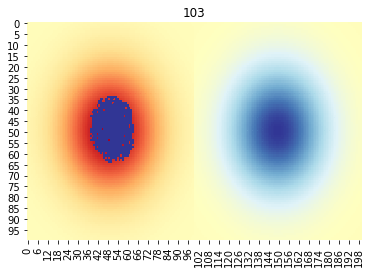

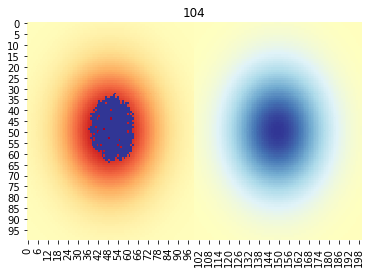

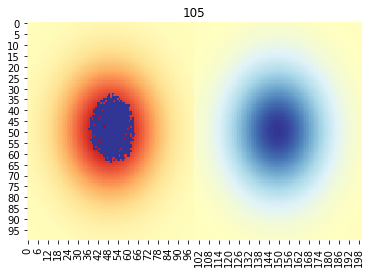

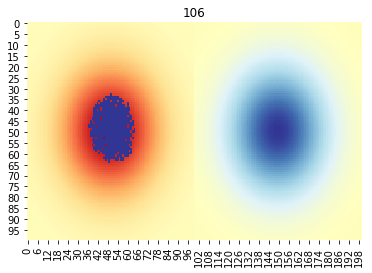

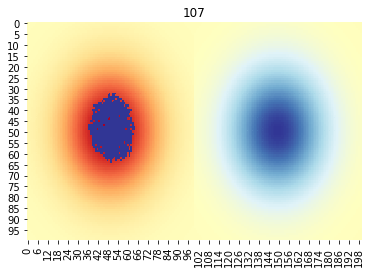

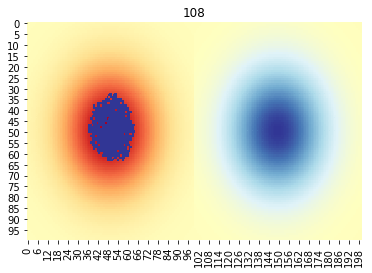

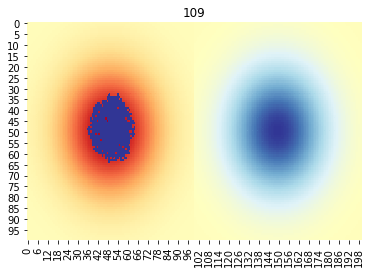

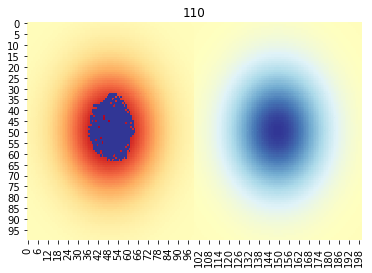

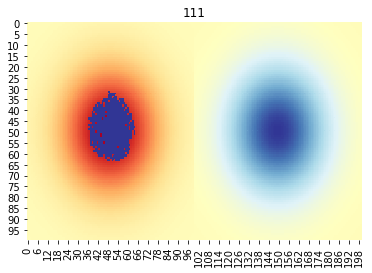

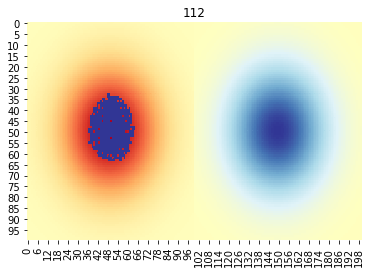

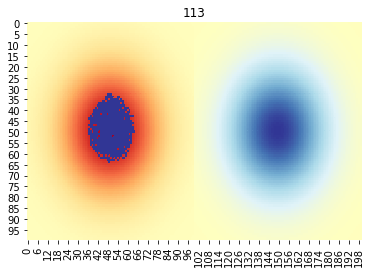

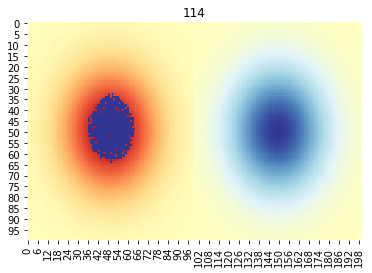

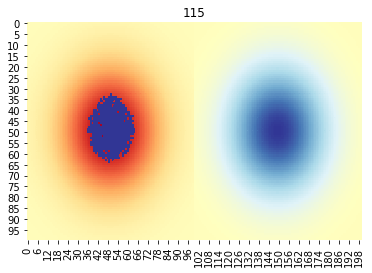

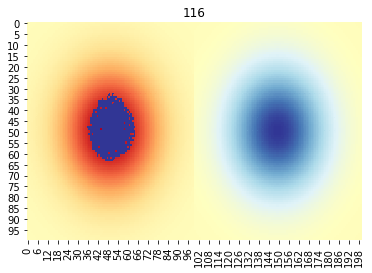

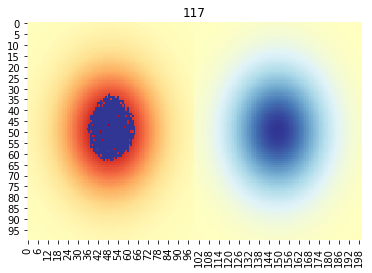

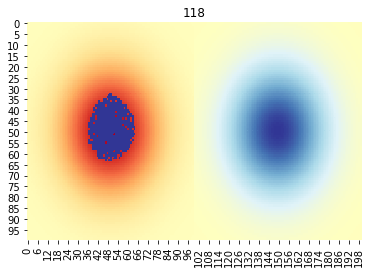

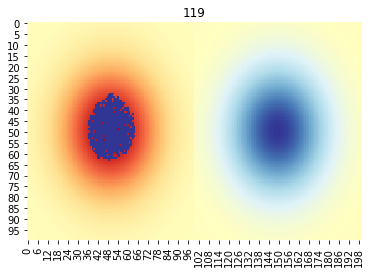

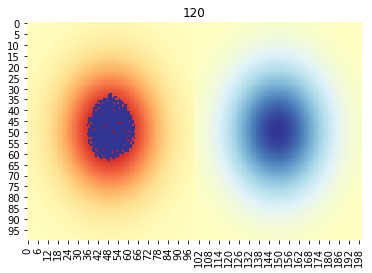

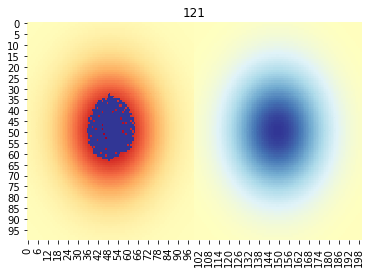

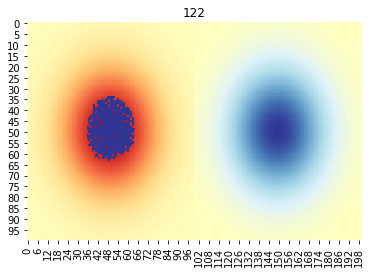

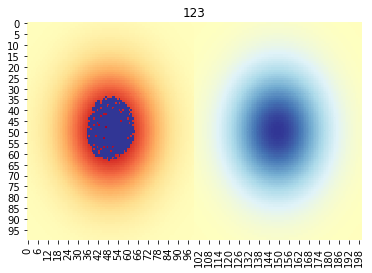

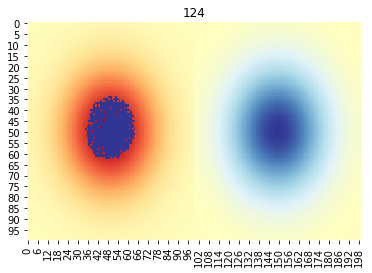

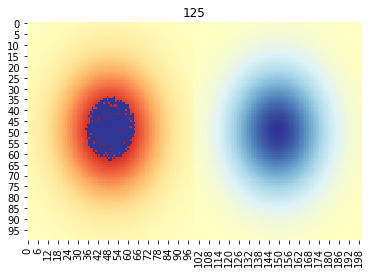

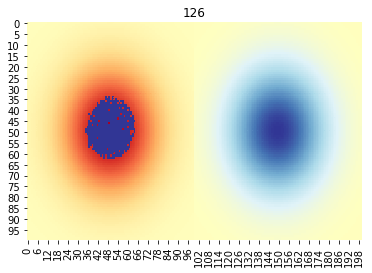

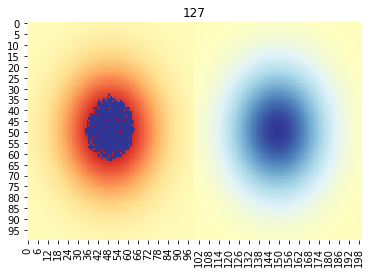

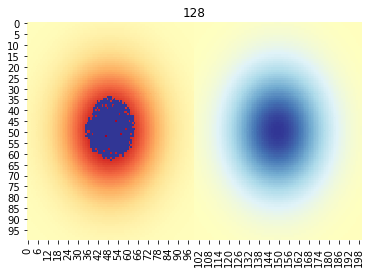

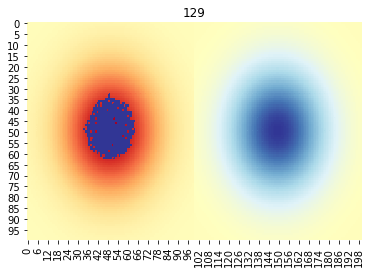

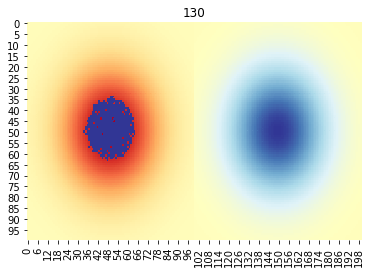

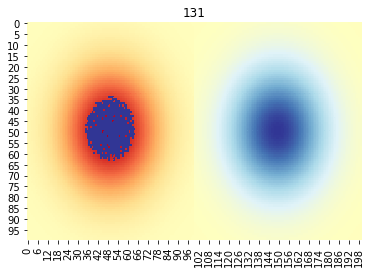

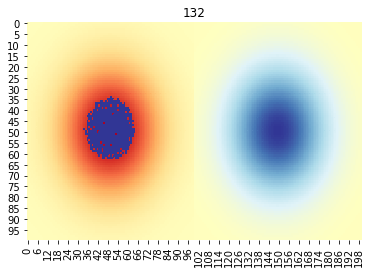

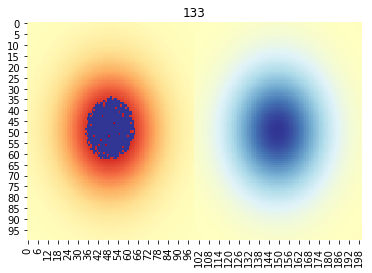

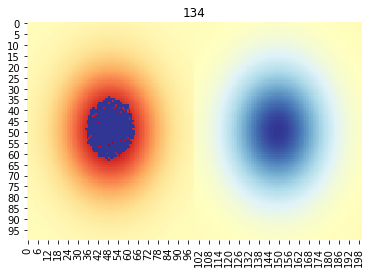

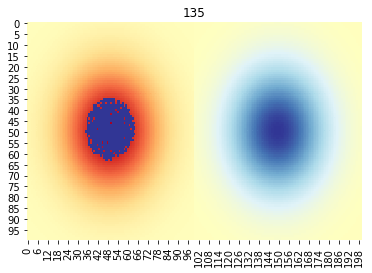

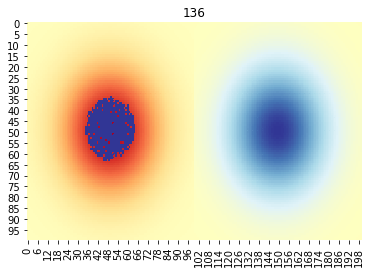

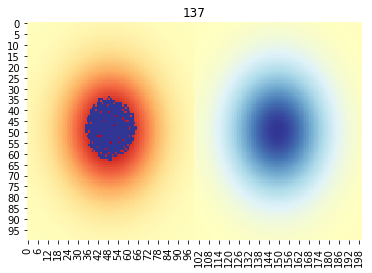

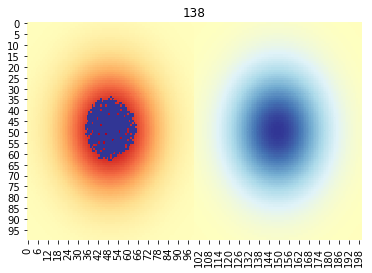

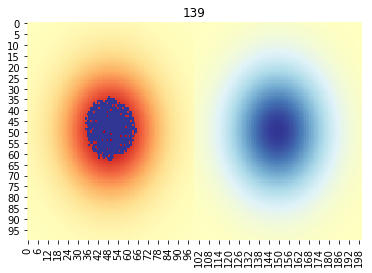

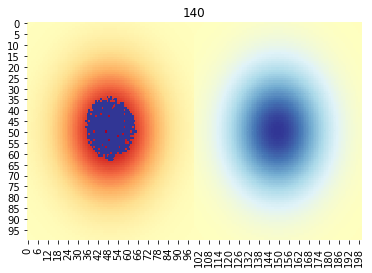

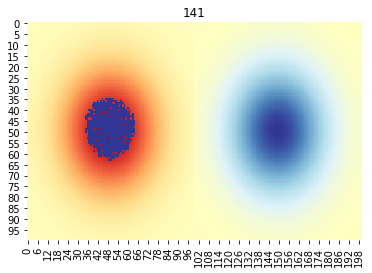

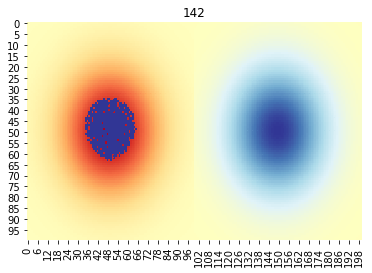

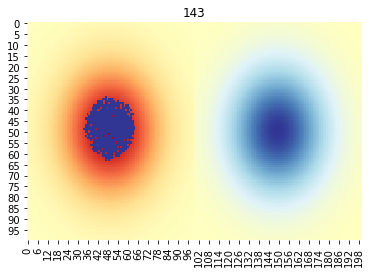

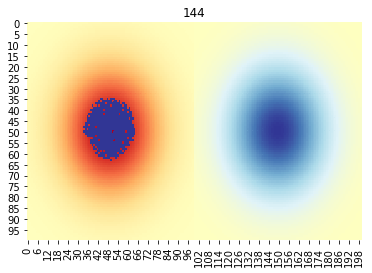

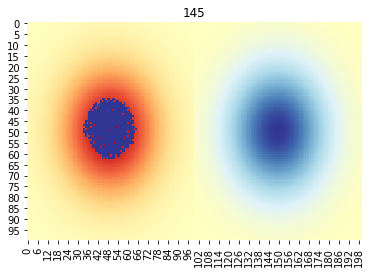

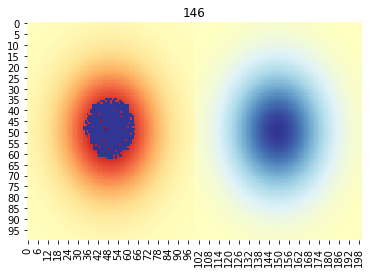

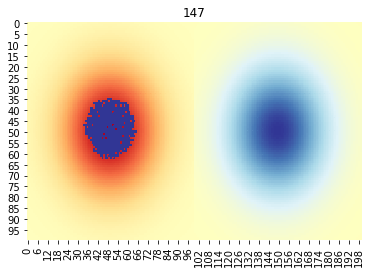

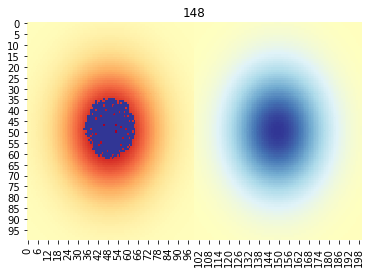

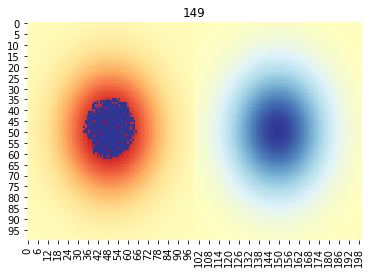

In [23]:

for frame in range(150):
    
    
    #random.shuffle(agents)
    #Update every agent position
    for ida,agent in enumerate(agents):
        
        
        
        #compute next agent pos.
        #kernel=(slice(agent[0]-1,agent[0]+2,1),slice(agent[1]-1,agent[1]+2,1))
        #print(render[kernel])
        if not sum(sum(render[agent[0]-1:agent[0]+2,agent[1]-1:agent[1]+2]))==9:
            id_pos=np.argmin(render[agent[0]-1:agent[0]+2,agent[1]-1:agent[1]+2])
            #print(id_pos)
            direction=np.unravel_index(id_pos,(3,3))
            #print(i,j)
            new_pos=(agent[0]+direction[0]-1,agent[1]+direction[1]-1)
            agents[ida]=new_pos
            render[agent]=life_map[agent]
            render[new_pos]=1
        
        
    fig, ax = plt.subplots()
    ax.set_title(frame)
    sns.heatmap(render,cmap='RdYlBu',cbar=False,axes=ax);
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)



### Create gif and show it

In [24]:
kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('life.gif', images, fps=10)

![SegmentLocal](life.gif "segment")

# Experimento 3 hay una cabeza?, cómo se actualizan los nodos.

In [ ]:
There is a head??